# **Demented vs. Nondemented Classification**
---



**Project Overview**

This project involves developing a Machine Learning model to classify patients as demented or non-demented. It is conducted independently using data from the [MRI and Alzheimer's Kaggle Dataset](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers?select=oasis_longitudinal.csv).

  **Objectives** :  The primary goal for this project is to understand each step in the machine learning development processes, creating a structured guide for developing and deploying the demented vs non-demented classification model. Key steps covered in this project are as follows:
  - `Data Collection`: Gathering and organizing relevant data for model development and training
  - `Data Preprocessing`: Cleaning and preparation stage before proceeding to the analysis stage.
  - `Exploratory Data Analysis (EDA)`: Analyzing the prepared data through visualization and identifying correlations or patterns within variables.
  - `Feature Engineering`: Feature selection to improve efficiency and model accuracy.
  - `Model Selection`: Testing and choosing the most suitable model for classification.
  - `Hyperparameter Tuning`: Optimizing model parameters to enhance model performance using various techniques.
  - `Model Training`: Training the selected model to learn patterns.
  - `Model Evaluation`: Evaluating and giving assesment on model accuracy and effectiveness using several evaluation metrics.
  - `Model Deployment`: Deploying the model to make prediction in a production setting.


To begin, we must first import the necessary libraries. Each library modules will be deployed throughout the model development according to their function and use, as follows:

`Numpy`, `Pandas`, `Pickle`, `Matplotlib`, `Seaborn`, `Random`, `Scikit-learn`

In [1]:
#import libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

##**A. Data Collection**

Now that we have declared each of the important libraries, we can finally start loading the dataset. Here, we will transform the dataset file we have from a .csv file into a readable format using **pd.read_csv**:

In [2]:
pdDS = pd.read_csv('/content/DementedvsNonDemented.csv')

But wait! Before we proceed, there is one more step that we can take. Creating a copy of the table data will prove useful in the long way. We can experiment with the dataframe without affecting the original data.

In [3]:
DS = pdDS.copy()

Once done, now we can take a look at the dataframe we have and gain initial insight on the data types of our variables.

In [4]:
DS

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


Dataset Variable details:

<center>

|**Column Name**|**Description**|**Data Type**|
|:---|:---|:---|
|**Subject ID**|**Subject Identification (i.e. OAS2_0001)**|**Categorical Nominal**|
|**MRI ID**|**MRI Exam Identification (i.e. OAS2_0001_MR1)**|**Categorical Nominal**|
|**Group**|**Class (i.e. Demented, Nondemented)**|**Categorical Nominal**|
|**Visit**|**Number of visits (i.e. 1-5)**|**Categorical Ordinal**|
|**MR Delay**|**Number of days of delay between visits (i.e. 0-2639)**|**Numerical Discrete**|
|**M/F**|**Gender (i.e. M, F)**|**Categorical Nominal**|
|**Hand**|**Right or Left-Handed (i.e. R)**|**Categorical Nominal**|
|**Age**|**Age at time of image acquisition (years). (i.e. 60-98)**|**Numerical Discrete**|
|**EDUC**|**Years of education (i.e. 6-23)**|**Numerical Discrete**|
|**SES**|**Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status) (i.e. 1-5)**|**Numerical Discrete**|
|**MMSE**|**Mini-Mental State Examination (i.e. 4-30)**|**Numerical Discrete**|
|**CDR**|**Clinical Dementia Rating (i.e. 0-2)**|**Numerical Continuous**|
|**eTIV**|**Estimated total intracranial volume (cm^3) (i.e. 1106-2004)**|**Numerical Discrete**|
|**nWBV**|**Normalized whole brain volume: expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process (i.e. 0.64-0.84)**|**Numerical Continuous**|
|**ASF**|**Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e. the determinant of the transform matrix) (i.e. 0.88-1.59)**|**Numerical Continuous**|

In [5]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [6]:
DS.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


##**B. Data Preprocessing**

From here we can see that ....

Furthermore, duplicate....

In [7]:
DS.duplicated().sum()

0

In [8]:
DS.nunique()

,0
Subject ID,150
MRI ID,373
Group,3
Visit,5
MR Delay,201
M/F,2
Hand,1
Age,39
EDUC,12
SES,5


Drop uncorrelated: `Subject ID`, `MRI ID`, and `Hand`. both subject ID and MRI ID were dropped due to their inherent value being a unique code for each patients and MRI scans, something which does not have any particular meaning related to Dementia. The Hand variable meanwhile, only have 1 unique value, as seen above, and will not be able to provide any information or variability for the model to learn from.

In [9]:
DS = DS.drop(columns=['MRI ID', 'Hand'])

In [10]:
#Check which variable contain missing value ('NaN')
for i, var in enumerate(DS):
  if any(DS.iloc[:,i].isnull()):
    print(var, DS.iloc[:,i].isnull().sum())

SES 19
MMSE 2


Based on the previous section, we now know that our dataset contain several missing values. To identify the category of missing values, we can filtered the dataframe to display only the data's with NaN values:

In [11]:
DS[DS.isnull().any(axis=1)]

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,Demented,1,0,M,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,Demented,3,518,M,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,Demented,4,1281,M,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,Demented,1,0,F,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,Demented,2,490,F,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,Demented,1,0,F,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,Demented,2,807,F,83,12,NaN,23.0,0.5,1484,0.750,1.183


The filtered dataframe provided the necessary insights efficiently. Out of the 12 columns, only two--SES and MMSE--contain  missing values. The SES column has a total of 19 missing entries, while MMSE has 2, representing approximately 5.1% and 0.5% of the total data, respectively. Further inspection revealed that many missing values originate from the same subject IDs, indicating that fewer subjects are responsible for the missing values than initialy appeared.

Closer examination on the variable details uncovered key insight that defined the category of the missing values. The column SES pertains to the subject's economic condition, while the MMSE column reflects the subject's mental condition. Both variables are likely to be left blank for particular reasons such as the subject's reluctance to disclose this information.

These insights combined indicate that the missing values falls under the category of **MNAR** (Missing Not At Random). Normally, missing values in this category require complex approaches to produce optimal inferences. However, to streamline the overall model development, methods such as **multiple imputation** (MI) can be applied using the following procedure to address these missing values.

To impute the missing data, here we will employe the `IterativeImputer` function derived from `Scikit-learn`. This particular imputation method was chosen due to the inherent property of the missing data--Missing Not At Random (MNAR), as discussed previously. This imputation method will ensure sufficient interference computation to produce

In [12]:
#Impute missing data with IterativeImputer from sklearn
DSimputer = IterativeImputer()
imputedDS = DSimputer.fit_transform(DS[['SES','MMSE']])

imputedDS = pd.DataFrame(imputedDS, columns=DS[['SES','MMSE']].columns)

#Convert continuous data on SES and MMSE into discrete data
imputedDS['SES'] = round(imputedDS['SES'])
imputedDS['MMSE'] = round(imputedDS['MMSE'])

imputedDS.head(5)

,SES,MMSE
0,2.0,27.0
1,2.0,30.0
2,3.0,23.0
3,2.0,28.0
4,3.0,22.0


In [13]:
DS.head()

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [14]:
DS['SES'] = imputedDS['SES']
DS['MMSE'] = imputedDS['MMSE']
DS.head()

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,Demented,1,0,M,75,12,3.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,1895,M,80,12,3.0,22.0,0.5,1698,0.701,1.034


Before we proceed to the next section, one last thing we must do is convert any value not categorized into 'Dementia' and 'Nondementia'. Because as we learned from the data information above, the 'Group' variable contained as many as 3 unique value. Hence, we need to change them into 'Dementia' first before we can proceed on exploratory data and other steps in this machine learning development.

To do that, first we check the unique value within `Group` variable:

In [15]:
DS['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

As seen, the third value not fallen into either 'Demented' or 'Nondemented' is categorized as 'Converted'. This value, based on information from data source, refer to patients who was diagnosed as 'Demented' on a later date. In this project, due to inssuficient information, each Converted value will not be separated into 'Demented' and 'Nondemented' on each MRI Scans, and will instead be recategorized as 'Demented'

In [16]:
DS.loc[DS['Group']=='Converted','Group'] = 'Demented'

In [17]:
DS['Group'].unique()

array(['Nondemented', 'Demented'], dtype=object)

#**C. Exploratory Data Analysis (EDA)**

In [18]:
col_DS = DS.columns
print(len(DS.columns))
col_DS

13


Index(['Subject ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Age', 'EDUC', 'SES',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

### I. Histplot

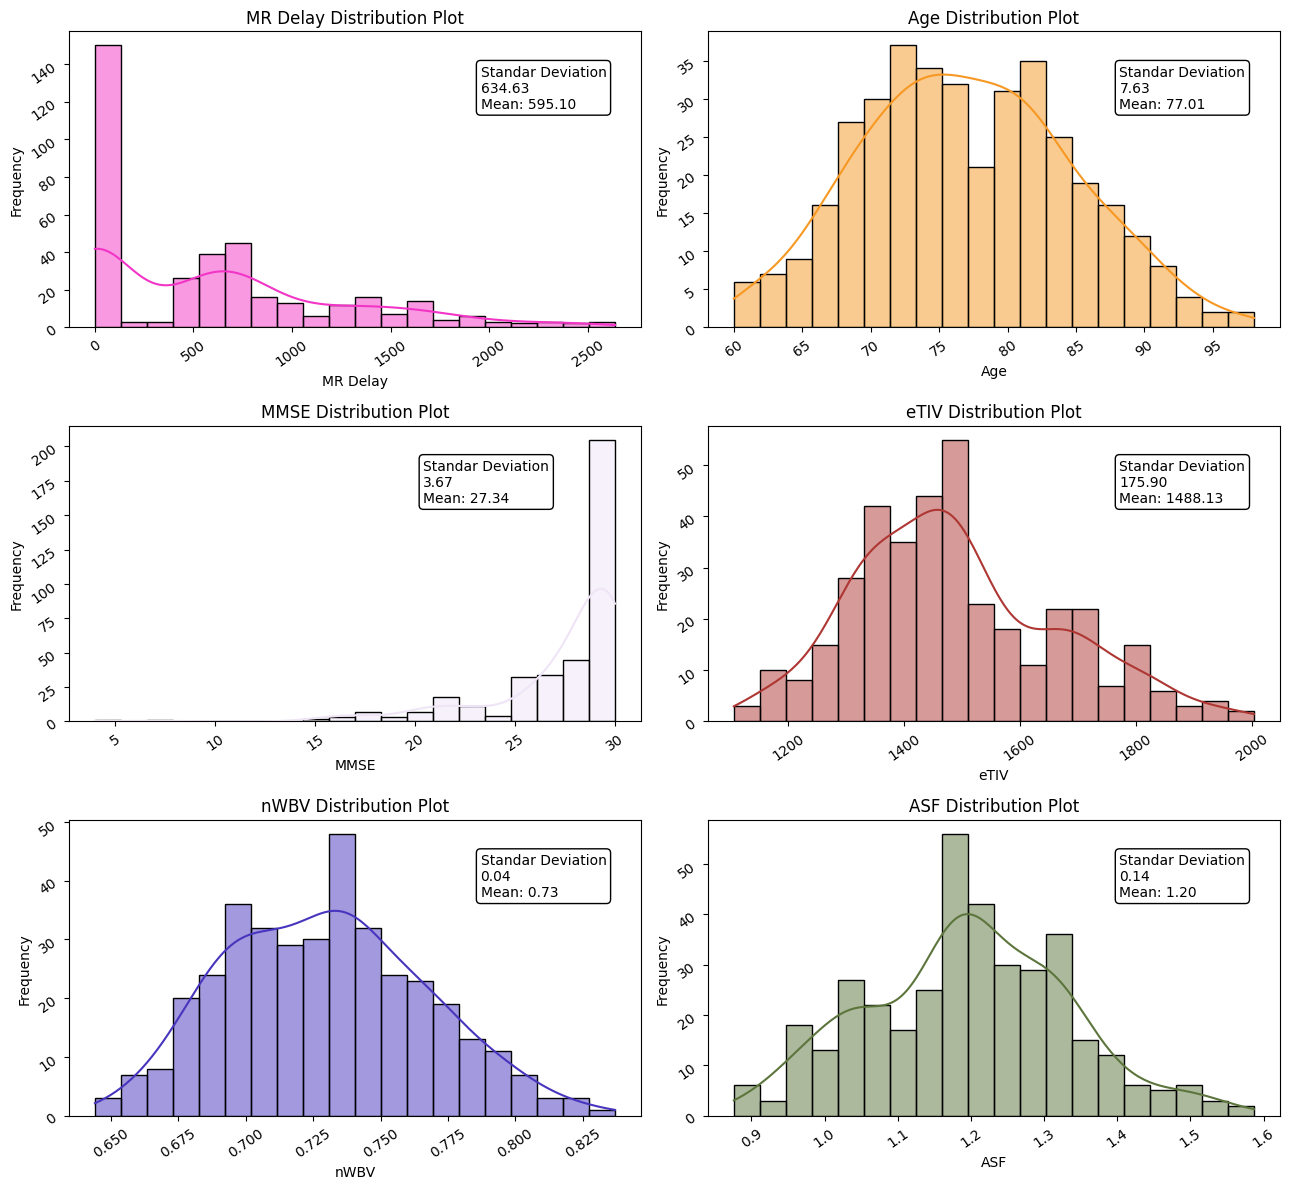

In [19]:
from matplotlib.patches import Rectangle

col_hist = ['MR Delay', 'Age', 'MMSE', 'eTIV', 'nWBV', 'ASF']

fig, axes = plt.subplots(3,2, figsize=(13,12))
axes = axes.flatten()

def random_color():
    return [random.random() for _ in range(3)]

for i, var in enumerate(col_hist):
  std = np.std(DS[var])
  mn = np.mean(DS[var])

  sns.histplot(data=DS, x=var, ax=axes[i], kde=True,color=random_color(), edgecolor='black', bins=20)
  axes[i].set_title(f'{var} Distribution Plot')
  axes[i].set_xlabel(var)
  axes[i].set_ylabel('Frequency')
  axes[i].tick_params(labelrotation=35)

  if var == 'MMSE':
    x_y = (0.6,0.85)
  else:
    x_y = (0.7,0.85)

  props = dict(boxstyle='round', edgecolor='black', facecolor='white')
  axes[i].annotate(f'Standar Deviation\n{std:.2f}\nMean: {mn:.2f}', xy=x_y,
                   xycoords="axes fraction", xytext=(8,8), textcoords="offset points",
                   ha='left', va='top', bbox=props)


for j in range(len(col_hist), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

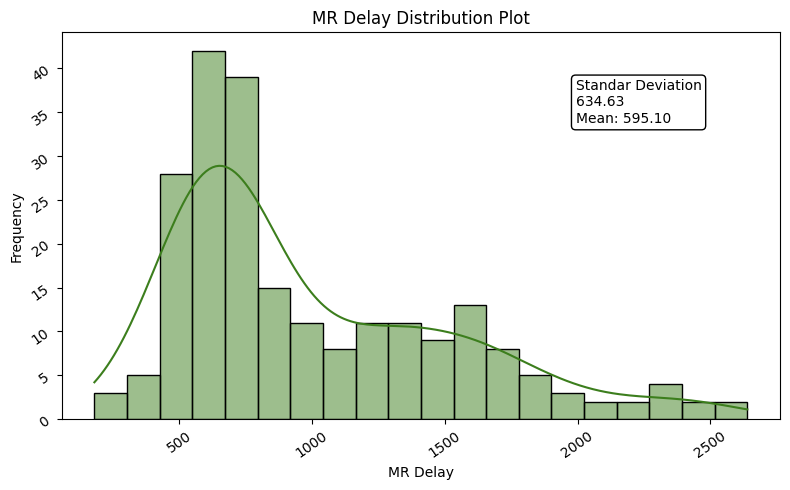

In [20]:
mrd = DS[DS['MR Delay']>0]

std = np.std(DS['MR Delay'])
mn = np.mean(DS['MR Delay'])

plt.figure(figsize=(8,5))
sns.histplot(mrd['MR Delay'], label='MR Delay', kde=True,color=random_color(), edgecolor='black', bins=20)
plt.title('MR Delay Distribution Plot')
plt.xlabel('MR Delay')
plt.ylabel('Frequency')
plt.tick_params(labelrotation=35)

props = dict(boxstyle='round', edgecolor='black', facecolor='white')
plt.annotate(f'Standar Deviation\n{std:.2f}\nMean: {mn:.2f}', xy=x_y,
                   xycoords="axes fraction", xytext=(8,8), textcoords="offset points",
                   ha='left', va='top', bbox=props)

plt.tight_layout()
plt.show()

### Countplot

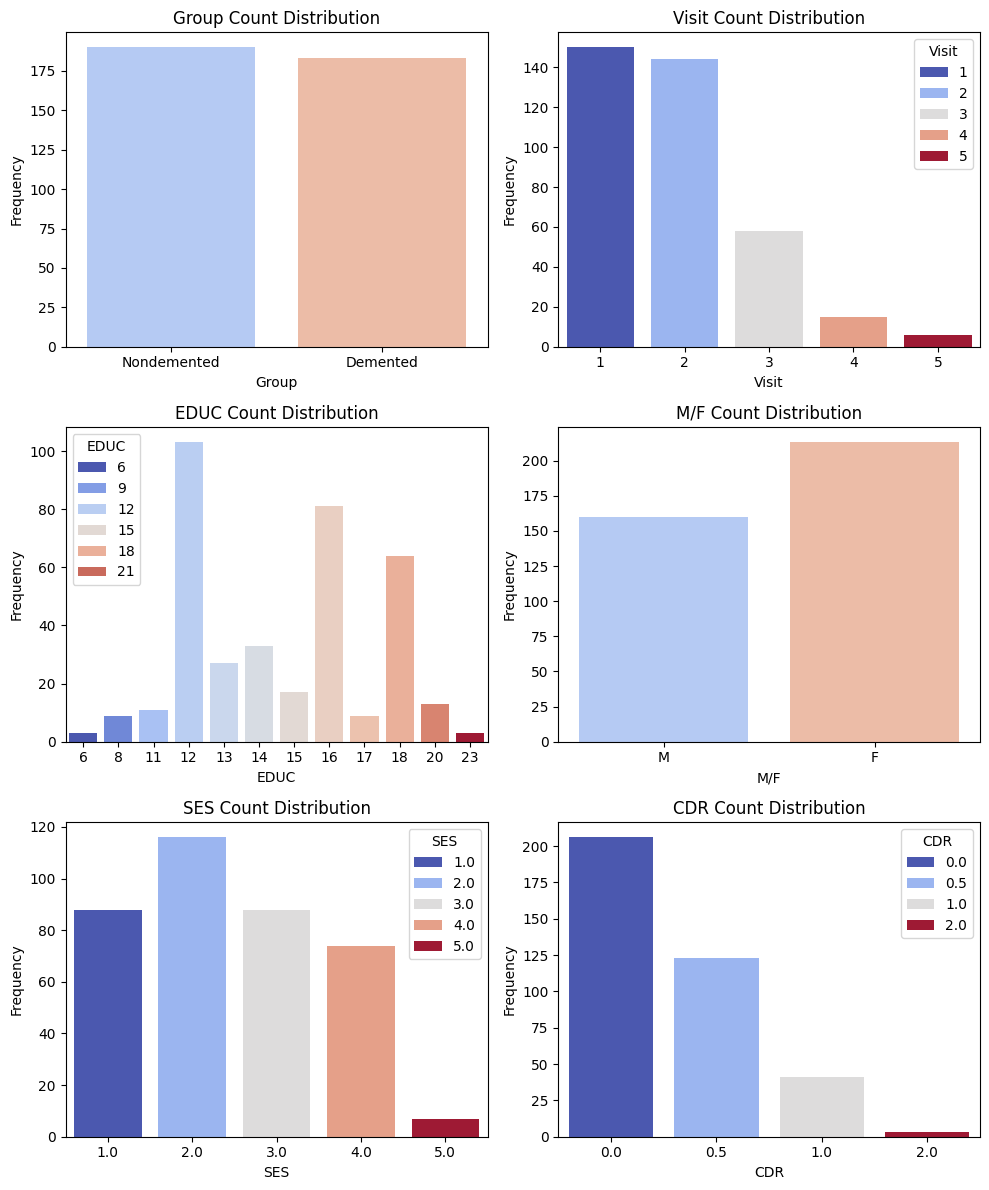

In [21]:
col_bar = ['Group', 'Visit', 'EDUC','M/F', 'SES', 'CDR']

fig, axes = plt.subplots(3,2, figsize=(10,12))
axes = axes.flatten()

for i, var in enumerate(col_bar):
  sns.countplot(x = var, data=DS, ax=axes[i],hue=var, palette='coolwarm')
  axes[i].set_title(f'{var} Count Distribution')
  axes[i].set_xlabel(var)
  axes[i].set_ylabel('Frequency')


for j in range(len(col_bar), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

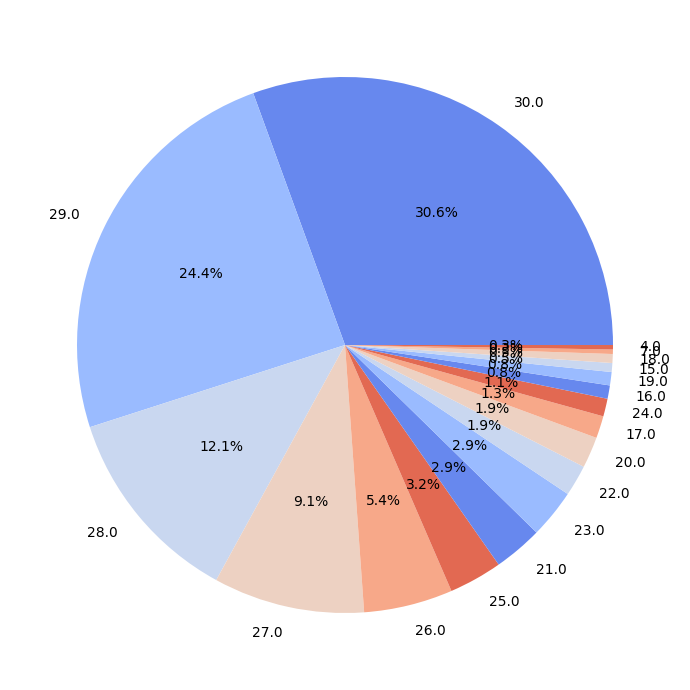

In [22]:
count = DS['MMSE'].value_counts().to_dict()

palette = sns.color_palette('coolwarm')

plt.figure(figsize=(7,7))

plt.pie(count.values(), labels=count.keys(),colors=palette, autopct='%0.1f%%')

plt.tight_layout()
plt.show()

#**Feature Engineering**

In [102]:
Coded_DS = DS.copy()
DS_to_convert = ['Subject ID', 'Group', 'M/F']

for col in DS_to_convert:
  Coded_DS[col] = Coded_DS[col].astype('category').cat.codes

In [103]:
Coded_DS = Coded_DS.groupby(['Subject ID']).mean()
Coded_DS

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
0,1.0,1.500000,228.500000,1.0,87.500000,14.0,2.000000,28.500000,0.000000,1995.500000,0.688500,0.879500
1,0.0,2.000000,818.333333,1.0,77.000000,12.0,2.666667,24.333333,0.500000,1704.666667,0.716667,1.030000
2,1.0,1.500000,269.000000,0.0,89.000000,18.0,3.000000,27.500000,0.000000,1207.500000,0.714000,1.453000
3,1.0,2.000000,871.000000,1.0,82.666667,12.0,4.000000,29.000000,0.166667,1696.333333,0.709333,1.034667
4,0.0,2.666667,599.666667,1.0,73.000000,16.0,2.000000,27.333333,0.833333,1364.666667,0.728333,1.286000
...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,1.500000,388.000000,1.0,74.000000,12.0,3.000000,21.500000,0.500000,1657.500000,0.697000,1.058500
146,1.0,2.500000,755.250000,0.0,68.000000,13.0,2.000000,30.000000,0.000000,1504.250000,0.737250,1.166500
147,0.0,1.500000,276.500000,0.0,72.500000,16.0,3.000000,22.500000,0.750000,1352.500000,0.720500,1.297500


In [99]:
Coded_DS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Group     150 non-null    object
 1   Visit     150 non-null    object
 2   MR Delay  150 non-null    object
 3   M/F       150 non-null    object
 4   Age       150 non-null    object
 5   EDUC      150 non-null    object
 6   SES       150 non-null    object
 7   MMSE      150 non-null    object
 8   CDR       150 non-null    object
 9   eTIV      150 non-null    object
 10  nWBV      150 non-null    object
 11  ASF       150 non-null    object
dtypes: object(12)
memory usage: 16.9+ KB


###Outlier

To check for outlier within out datasets, we can once again visit the number of unique values within each variables using the `.nunique()` function.

In [104]:
Coded_DS.nunique()

,0
Group,2
Visit,6
MR Delay,144
M/F,2
Age,78
EDUC,12
SES,8
MMSE,36
CDR,12
eTIV,147


Based on the information above, we can infer that some variables such as Visit, M/F, EDUC, SES, MMSE, and CDR fall into the categorical columns type. Generally, this type of columns can be exempted from outlier detection. Thus, in this section, we will check for outliers from the remaining numerical columns: MR Delay, Age, eTIV, nWBV, and ASF.

In [108]:
copy = Coded_DS['Group'].copy()
copy

,Group
Subject ID,
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
145,0.0
146,1.0
147,0.0


In [119]:
copy[copy==1] = 'Demented'
copy[copy==0] = 'Nondemented'

<ipython-input-119-6dc208e5b8eb>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Demented' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  copy[copy==1] = 'Demented'


In [120]:
copy

,Group
Subject ID,
0,Demented
1,Nondemented
2,Demented
3,Demented
4,Nondemented
...,...
145,Nondemented
146,Demented
147,Nondemented


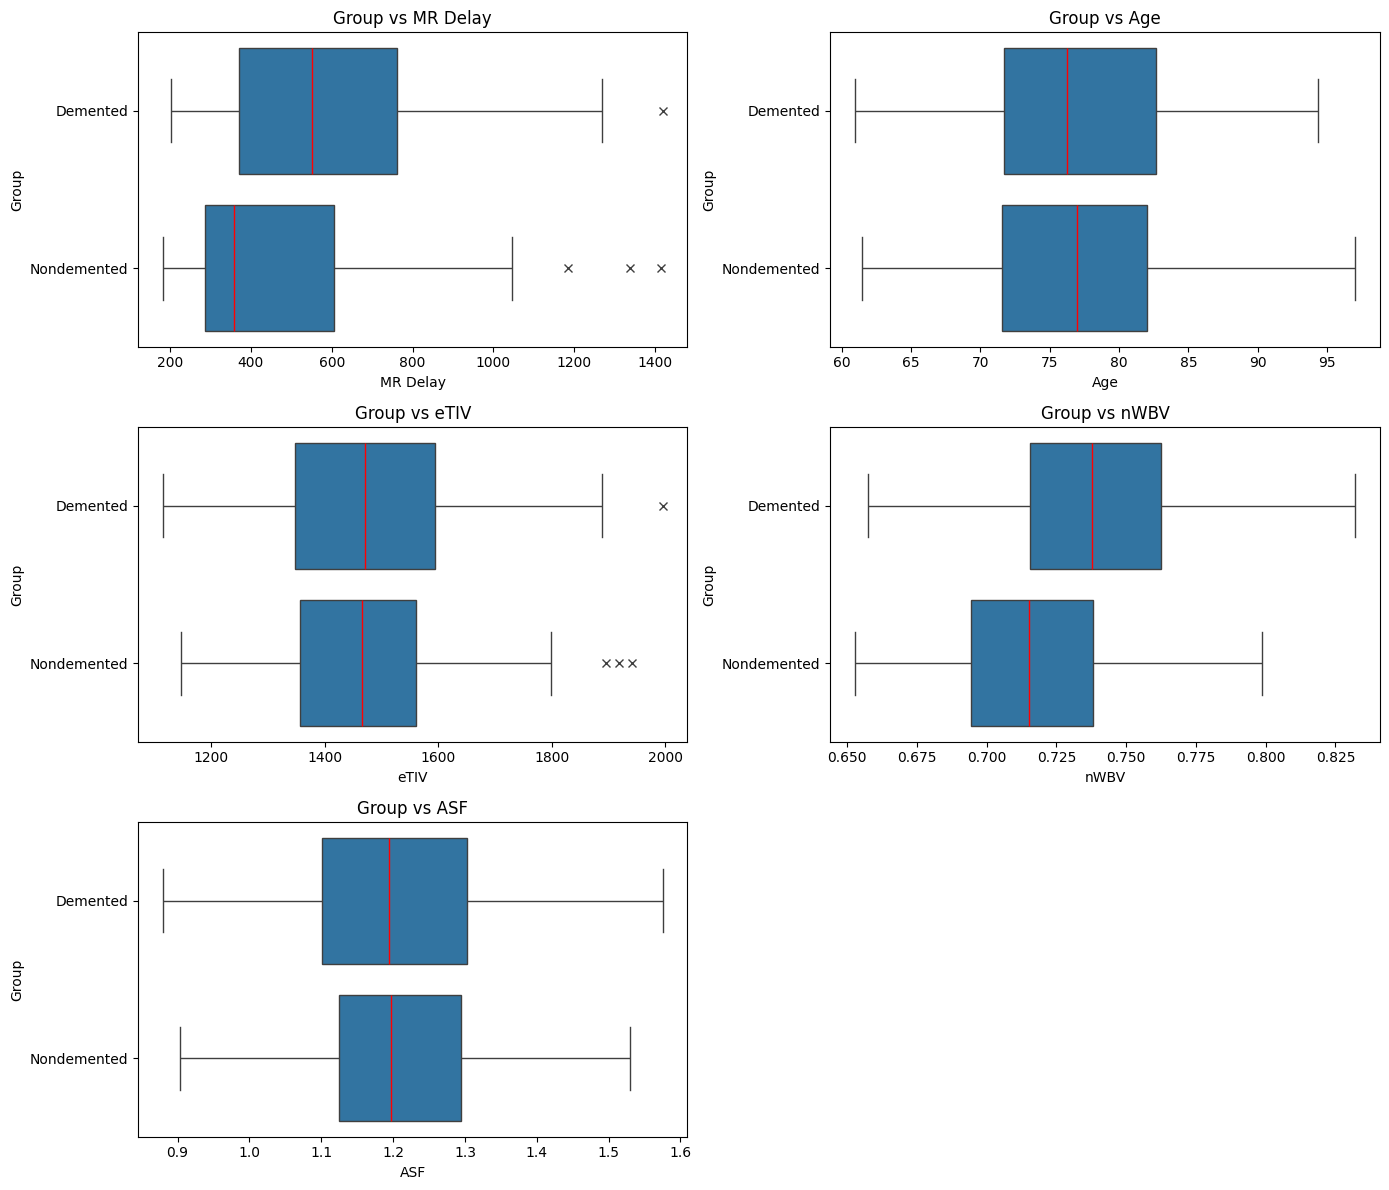

In [121]:
fig, axes = plt.subplots(3, 2, figsize=(14,12))
axes = axes.flatten()
DS_out = ['MR Delay', 'Age', 'eTIV', 'nWBV', 'ASF']


for i, var in enumerate(DS_out):
  ax=axes[i]
  sns.boxplot(data=Coded_DS, x=var, y=copy, ax=ax, medianprops={'color':'r'}, flierprops={'marker':'x'})
  ax.set_title(f'Group vs {var}')

for j in range(len(DS_out),len(axes)):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

as we can see, numerical columns such as MR Delay and eTIV shows the presence of outliers. Much more than the other columns. before proceeding to detecting the number of outliers. First, we must check for each column skewness type.

In [123]:
#Define skewness of each numerical column

def check_skewness(df, cols):
  normal = {}
  skewed = {}
  extremely_skewed = {}

  for var in cols:
    skew_score = round(df[var].skew(),2)
    if skew_score <= 0.5:
      normal[var] = skew_score
    elif 0.5 < abs(skew_score) < 1:
      skewed[var] = skew_score
    else:
      extremely_skewed[var] = skew_score

  return normal, skewed, extremely_skewed

normal, skewed, extremely_skewed = check_skewness(Coded_DS, DS_out)

print(f'Normal: {normal}\nSkewed: {skewed}\nExtremely Skewed: {extremely_skewed}')

Normal: {'Age': 0.16, 'nWBV': 0.34, 'ASF': 0.04}
Skewed: {'eTIV': 0.59}
Extremely Skewed: {'MR Delay': 1.14}


In [125]:
#Find Outliers

def check_outlier_percentage(df, skew_type, cols, distance=1.5):
  for var in cols:
    if skew_type == 'normal':
      std = df[var].std()
      mean = df[var].mean()
      lower_bound = mean - (3 * std)
      upper_bound = mean + (3 * std)
    elif skew_type == 'skewed':
      Q1 = df[var].quantile(0.25)
      Q3 = df[var].quantile(0.75)
      IQR = Q3-Q1
      lower_bound = Q1 - (IQR * distance)
      upper_bound = Q3 + (IQR * distance)

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    outlier_percentage = len(outliers) / len(df) * 100
    outlier_count = len(outliers)

    print(f'Outlier Percentage and Count of {var}: {outlier_percentage:.2f}% and {outlier_count}')

check_outlier_percentage(Coded_DS,'normal',normal.keys())
check_outlier_percentage(Coded_DS,'skewed',skewed.keys())
check_outlier_percentage(Coded_DS,'skewed',extremely_skewed.keys())

Outlier Percentage and Count of Age: 0.00% and 0
Outlier Percentage and Count of nWBV: 0.00% and 0
Outlier Percentage and Count of ASF: 0.00% and 0
Outlier Percentage and Count of eTIV: 1.33% and 2
Outlier Percentage and Count of MR Delay: 2.67% and 4


- none of the normal column have any outlier
- MRI Delay have normal outlier count and percentage. Moreover, the nature of

In [127]:
distance = 1.5
Q1 = Coded_DS['MR Delay'].quantile(0.25)
Q3 = Coded_DS['MR Delay'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - (IQR * distance)
upper_bound = Q3 + (IQR * distance)

print(f'lower bound: {lower_bound}, upper_bound: {upper_bound}')

outlier = Coded_DS[(Coded_DS['MR Delay'] < lower_bound) | (Coded_DS['MR Delay'] > upper_bound)]
outlier

lower bound: -238.22916666666669, upper_bound: 1260.9375


,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
28,0.0,2.5,1415.0,1.0,86.0,12.0,4.0,27.0,0.5,1483.0,0.71525,1.18325
58,1.0,3.0,1268.6,1.0,83.4,17.0,1.0,29.2,0.0,1700.6,0.71540,1.03200
60,1.0,3.0,1418.0,0.0,74.0,14.0,3.0,28.6,0.0,1507.4,0.77780,1.16420
104,0.0,3.0,1337.0,1.0,82.2,18.0,1.0,29.2,0.4,1656.6,0.70580,1.05940


In [128]:
Q1 = Coded_DS['eTIV'].quantile(0.25)
Q3 = Coded_DS['eTIV'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - (IQR * distance)
upper_bound = Q3 + (IQR * distance)

print(f'lower bound: {lower_bound}, upper_bound: {upper_bound}')

outlier = Coded_DS[(Coded_DS['eTIV'] < lower_bound) | (Coded_DS['eTIV'] > upper_bound)]
outlier

lower bound: 1009.1875, upper_bound: 1919.6875


,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
0,1.0,1.5,228.5,1.0,87.5,14.0,2.0,28.5,0.00,1995.5,0.6885,0.8795
54,0.0,1.5,248.5,1.0,61.5,18.0,1.0,30.0,0.75,1942.5,0.7325,0.9035


The presence of outlier, coupled with the nature of the MRI Delay value indicate the need for applying a transformation. Which will be addressed later on.

Outlier Transformation with Winsorizer()

In [136]:
pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 7.0 MB/s eta 0:00:00


In [170]:
from feature_engine.outliers import Winsorizer

def winsorizer(df, variables, capping_method='iqr', tail='both', fold=1.5):
  winsorizer = Winsorizer(capping_method=capping_method, tail=tail, fold=fold, variables=variables)
  df_trained = winsorizer.fit_transform(df)
  return df_trained

Transformed_DS = winsorizer(Coded_DS, ['eTIV','MR Delay'])
Transformed_DS.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
0,1.0,1.500000,228.500000,1.0,87.500000,14.0,2.000000,28.500000,0.000000,1919.687500,0.688500,0.879500
1,0.0,2.000000,818.333333,1.0,77.000000,12.0,2.666667,24.333333,0.500000,1704.666667,0.716667,1.030000
2,1.0,1.500000,269.000000,0.0,89.000000,18.0,3.000000,27.500000,0.000000,1207.500000,0.714000,1.453000
3,1.0,2.000000,871.000000,1.0,82.666667,12.0,4.000000,29.000000,0.166667,1696.333333,0.709333,1.034667
4,0.0,2.666667,599.666667,1.0,73.000000,16.0,2.000000,27.333333,0.833333,1364.666667,0.728333,1.286000


Re-check outlier

In [171]:
check_outlier_percentage(Transformed_DS,'normal',normal.keys())
check_outlier_percentage(Transformed_DS,'skewed',skewed.keys())
check_outlier_percentage(Transformed_DS,'skewed',extremely_skewed.keys())

Outlier Percentage and Count of Age: 0.00% and 0
Outlier Percentage and Count of nWBV: 0.00% and 0
Outlier Percentage and Count of ASF: 0.00% and 0
Outlier Percentage and Count of eTIV: 0.00% and 0
Outlier Percentage and Count of MR Delay: 0.00% and 0


### Corelation plot

<Axes: >

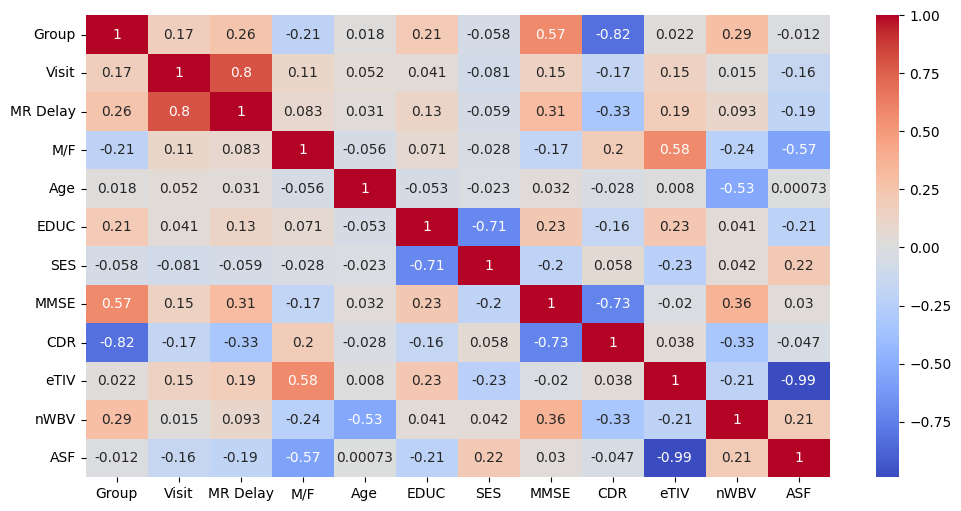

In [172]:
plt.figure(figsize=(12,6))
corr = Transformed_DS.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [176]:
corr.loc[(0.2<=abs(corr['Group'])) & (abs(corr['Group'])<0.9), 'Group']

,Group
MR Delay,0.257952
M/F,-0.210282
EDUC,0.212378
MMSE,0.572586
CDR,-0.820658
nWBV,0.289462


Based on the correlatio result above, we can assume that both `MMSE` and `CDR` has the most influence on `Group`. Other variables, on the other hand, doesn't display correlation as high as the two

which we will

### Imbalance Data Check

In [182]:
val = Transformed_DS['Group'].value_counts()
val

,count
Group,
0.0,78
1.0,72


In [186]:
diff = (val[0] - val[1])/val[0]*100
round(diff,2)

7.69

Less than 10%

### Feature Selection

In [188]:
X = Transformed_DS.drop(columns=['Group'])
Y = Transformed_DS['Group']
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.85,random_state=42, stratify=Y)

In [189]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((127, 11), (23, 11), (127,), (23,))

In [190]:
y_arr = [y_train.value_counts(), y_test.value_counts()]
ypd = pd.DataFrame(y_arr,index=['Y_Train','Y_Test'])

In [192]:
ypd

Group,0.0,1.0
Y_Train,66,61
Y_Test,12,11


In [193]:
#Checking missing value
x_null = [x_train.isnull().sum(),x_test.isnull().sum()]
xpd = pd.DataFrame(x_null, index=['x_train','x_test'])
xpd

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
x_train,0,0,0,0,0,0,0,0,0,0,0
x_test,0,0,0,0,0,0,0,0,0,0,0


In [194]:
y_train.isnull().sum()

0

In [ ]:
R_Scaler = RobustScaler()
Scaled_DS = R_Scaler.fit_transform(Coded_DS.drop(columns=['Group']))
Scaled_DSw = R_Scaler.fit_transform(Coded_DS.drop(columns='Group'))

In [ ]:
y_test.isnull().sum()

0